In [1]:
import numpy as np
subh = np.loadtxt('../_data/subhalos.dat')

halo_mask, = np.where((subh[:,15]==0) & (subh[:,16]==0))

subh_name = subh[:,0][halo_mask]
subh_ind  = np.int_(subh_name)
# nsubh = len(subh_name)

print(subh_ind)

[ 0  1  3  4  5  6  7  9 20 21 22 27 28 31 33 35 36 37 38 39 41 42 45 46
 49 50 51 53 54 64 65 66 69 73 74 79 84 85 87 88 90 91 92 95 96]


### Distribucion radial de edades

In [4]:
# import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as time
import bines2 as bines

path = '/z/omarioni/gradients/_simulations/snap_127/'

subh = (0,1,3,4,5)

# for j in range(0,1):
j= 0
snap = h5py.File(path + 'subhalo_'+str('%03d'%subh[j])+'.h5py', 'r')

aexp = snap['/Time'][()]
h    = snap['/h'][()]
Om_L = snap['/Omega_Lambda'][()]
Om_M = snap['/Omega_0'][()]

pstr = snap['/Str/Coordinates'][()]
mstr = snap['/Str/Masses'][()]
vstr = snap['/Str/Velocities'][()]

met  = snap['/Str/Metallicity'][()]
sft  = snap['/Str/FormationTime'][()]

amask, = np.where(sft>0) #aca puede haber particulas con age<0, esas no son estrellas son gas cells.
ages = time.conv2(sft[amask], h, Om_L, Om_M) #transformo el tiempo de formacion de factor de escala a Gyr
age  = np.max(ages) - ages #lo resto asi saco la edad de las particulas (inverso al tiempo de form)

xstr = pstr[amask,0]*aexp/h
ystr = pstr[amask,1]*aexp/h
zstr = pstr[amask,2]*aexp/h
rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

v_x = vstr[amask,0] *np.sqrt(aexp)
v_y = vstr[amask,1] *np.sqrt(aexp)
v_z = vstr[amask,2] *np.sqrt(aexp)

#----------------------masas----------------------------
mstr = mstr[amask]*1e10/h

veloc,=np.where(rstr < 3)

#----------componentes de la velocidad del centro de masa------------
vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

vx = v_x - vxcm
vy = v_y - vycm
vz = v_z - vzcm

e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,5)

xn_str = e1x*xstr + e1y*ystr + e1z*zstr
yn_str = e2x*xstr + e2y*ystr + e2z*zstr
zn_str = e3x*xstr + e3y*ystr + e3z*zstr

Rstr = np.sqrt(xn_str**2 + yn_str**2)

mask, = np.where((Rstr <= 50) & (zn_str <= 5) & (zn_str >-5))
# mask3, = np.where((Rstr < 50) & (zn_str < 30) & (zn_str > -30))

nbin = 15
# med_R,nodo_R = bines.rbin1(Rstr[mask],nbin)
nodo_R = np.linspace(0,50,nbin)
med_R = nodo_R

age_1,  = np.where((age[mask] > 0.5) & (age[mask] < 1.5))
age_2,  = np.where((age[mask] > 1.5) & (age[mask] < 2.5))
age_3,  = np.where((age[mask] > 2.5) & (age[mask] < 3.5))
age_4,  = np.where((age[mask] > 3.5) & (age[mask] < 4.5))
age_5,  = np.where((age[mask] > 4.5) & (age[mask] < 5.5))
age_6,  = np.where((age[mask] > 5.5) & (age[mask] < 6.5))
age_7,  = np.where((age[mask] > 6.5) & (age[mask] < 7.5))
age_8,  = np.where((age[mask] > 7.5) & (age[mask] < 8.5))
age_9,  = np.where((age[mask] > 8.5) & (age[mask] < 9.5))
age_10,  = np.where((age[mask] > 9.5) & (age[mask] < 10.5))
age_11, = np.where((age[mask] > 10.5) & (age[mask] < 11.5))
age_12, = np.where((age[mask] > 11.5) & (age[mask] < 12.5))
age_13, = np.where((age[mask] > 12.5) & (age[mask] < 13.5))

rr = Rstr[mask]
rr1 = rr[age_1]
rr2 = rr[age_2]
rr3 = rr[age_3]
rr4 = rr[age_4]
rr5 = rr[age_5]
rr6 = rr[age_6]
rr7 = rr[age_7]
rr8 = rr[age_8]
rr9 = rr[age_9]
rr10 = rr[age_10]
rr11 = rr[age_11]
rr12 = rr[age_12]
rr13 = rr[age_13]

zz = zn_str[mask]
z1  = zz[age_1]
z2  = zz[age_2]
z3  = zz[age_3]
z4  = zz[age_4]
z5  = zz[age_5]
z6  = zz[age_6]
z7  = zz[age_7]
z8  = zz[age_8]
z9  = zz[age_9]
z10 = zz[age_10]
z11 = zz[age_11]
z12 = zz[age_12]
z13 = zz[age_13]

mass = mstr[mask]
M1 = mass[age_1]
M2 = mass[age_2]
M3 = mass[age_3]
M4 = mass[age_4]
M5 = mass[age_5]
M6 = mass[age_6]
M7 = mass[age_7]
M8 = mass[age_8]
M9 = mass[age_9]
M10 = mass[age_10]
M11 = mass[age_11]
M12 = mass[age_12]
M13 = mass[age_13]


z4a  = np.zeros(nbin)
z8a  = np.zeros(nbin)
z10a = np.zeros(nbin)

for i in range(0,nbin-1):
    zetas4,  = np.where((rr4 >= nodo_R[i])  & (rr4 < nodo_R[i+1])  & (z4 > 0))
    zetas8,  = np.where((rr8 >= nodo_R[i])  & (rr8 < nodo_R[i+1])  & (z8 > 0))
    zetas10, = np.where((rr10 >= nodo_R[i]) & (rr10 < nodo_R[i+1]) & (z10 > 0))

    zz4  = np.argsort(z4[zetas4])
    zz8  = np.argsort(z8[zetas8])
    zz10 = np.argsort(z10[zetas10])
    
    Mbin_4  = np.cumsum(M4[zetas4][zz4])
    Mbin_8  = np.cumsum(M8[zetas8][zz8])
    Mbin_10 = np.cumsum(M10[zetas10][zz10])
    
    kk4,  = np.where(Mbin_4  < Mbin_4[-1]/2)
    kk8,  = np.where(Mbin_8  < Mbin_8[-1]/2)
    kk10, = np.where(Mbin_10 < Mbin_10[-1]/2)
    
    zeta4  = z4[zetas4][zz4]
    zeta8  = z8[zetas8][zz8]
    zeta10 = z10[zetas10][zz10]

    z4a[i]  = zeta4[kk4][-1]
    z8a[i]  = zeta8[kk8][-1]
    z10a[i] = zeta10[kk10][-1]


#### Hago los plots para los bines de edades

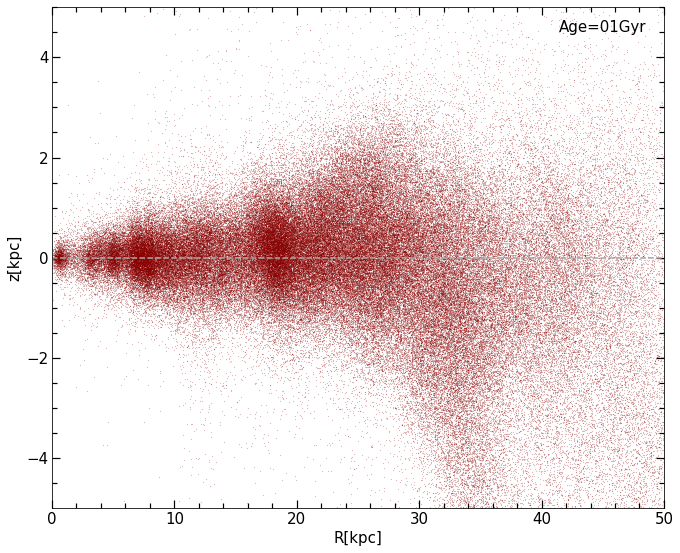

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

# ax.plot(Rstr[mask],zn_str[mask], '.k',markersize=0.05,alpha =0.7)
ax.plot(rr1,z1,   '.', markersize=0.2, alpha = 1, color='darkred')
# ax.plot(rr2,z2,   '.', markersize=0.2, alpha = 1, color='r')
# ax.plot(rr3,z3,   '.', markersize=0.2, alpha = 1, color='darkorange')
# ax.plot(rr4,z4,   '.', markersize=0.2, alpha = 1, color='orange')
# ax.plot(rr5,z5,   '.', markersize=0.2, alpha = 1, color='gold')
# ax.plot(rr6,z6,   '.', markersize=0.2, alpha = 1, color='yellowgreen')
# ax.plot(rr7,z7,   '.', markersize=0.2, alpha = 1, color='lime')
# ax.plot(rr8,z8,   '.', markersize=0.2, alpha = 1, color='g')
# ax.plot(rr9,z9,   '.', markersize=0.2, alpha = 1, color='springgreen')
# ax.plot(rr10,z10, '.', markersize=0.2, alpha = 1, color='c')
# ax.plot(rr11,z11, '.', markersize=0.2, alpha = 1, color='b')
# ax.plot(rr12,z12, '.', markersize=0.2, alpha = 1, color='blueviolet')
# ax.plot(rr13,z13, '.', markersize=0.2, alpha = 1, color='m')
# ax.plot(med_R,z4a,ls='--',color='k')
# ax.plot(med_R,z8a,ls=':',color='k')
# ax.plot(med_R,z10a,ls='-',color='k')
ax.axhline(y=0,ls='--',color='darkgray')
ax.text(45,4.5,'Age=01Gyr',fontsize=15,ha='center')
# for i in range(len(med_R)):
#     ax.axvline(x=med_R[i],ls='--',color='gray')
ax.set_ylim(-5,5)
ax.set_xlim(0,50)
ax.minorticks_on()
ax.tick_params( labelsize=15)
ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')
ax.set_xlabel('R[kpc]',fontsize=15)
ax.set_ylabel('z[kpc]',fontsize=15)
plt.show()

fig.savefig('../_imagenes/test_ages/subh000/sh_000_age_01.png',dpi=75, xxbox_inches='tight')

#### Aca veo que las lineas de la escala de altura de acuerdo de la edad esten de acuerdo a los puntos 

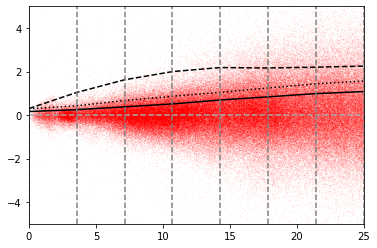

In [33]:
import matplotlib.pyplot as plt
# mask3, = np.where((Rstr < 50) & (zn_str < 30) & (zn_str > -30))
# plt.plot(Rstr[mask],zn_str[mask], '.k',markersize=0.05,alpha =0.7)
# plt.plot(rr4,z4, '.b',markersize=0.05,alpha=0.7)
# plt.plot(rr8,z8, '.g',markersize=0.05, alpha= 0.7)
plt.plot(rr10,z10, '.r',markersize=0.05, alpha= 0.8)
plt.plot(med_R,z4a,ls='--',color='k')
plt.plot(med_R,z8a,ls=':',color='k')
plt.plot(med_R,z10a,ls='-',color='k')
plt.axhline(y=0,ls='--',color='darkgray')
for i in range(len(med_R)):
    plt.axvline(x=med_R[i],ls='--',color='gray')
plt.ylim(-5,5)
plt.xlim(0,25)
plt.show()